# Internship test on movie recommendation system

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movie_df = pd.read_csv("P:\Artificial Intelligence\internship code\datasets\movie data\movies.csv")

In [3]:
movie_df.shape     # To find shape of movies.csv

(9742, 3)

In [4]:
rating_df = pd.read_csv("P:\Artificial Intelligence\internship code\datasets\movie data\\ratings.csv")

In [5]:
rating_df.shape   # To find shape of ratings.csv

(100836, 4)

In [6]:
# To access unique user IDs
unique_user_ids = rating_df['userId'].unique()
print(unique_user_ids)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [7]:
# To find maximum number of user rating
movie_ratings_count = rating_df.groupby('movieId').size().reset_index(name='rating_count')
max_rated_movie = movie_ratings_count[movie_ratings_count['rating_count'] == movie_ratings_count['rating_count'].max()]
max_rated_movie_id = max_rated_movie['movieId'].values[0]
max_rated_movie_title = movie_df[movie_df['movieId'] == max_rated_movie_id]['title'].values[0]
print(max_rated_movie_title)

Forrest Gump (1994)


In [11]:
# To find correct tags submitted by users to "Matrix, The (1999)

movie_title = "Matrix, The (1999)"
movie_ids = movie_df[movie_df['title'].str.extract(movie_title)]['movieId']
tags_df = pd.read_csv("P:\Artificial Intelligence\internship code\datasets\movie data\\tags.csv")
matrix_movie_id = movie_ids
matrix_tags = tags_df[(tags_df['movieId'] == matrix_movie_id)]
correct_tags = matrix_tags['tag'].unique()
print("Correct tags for 'Matrix, The (1999)':")
print(correct_tags)

Correct tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [13]:
# To find average rating

movie_title = "Terminator 2: Judgment Day (1991)"
movie_id = movie_df[movie_df['title'] == movie_title]['movieId'].values[0]
average_rating = rating_df[rating_df['movieId'] == movie_id]['rating'].mean()
print(average_rating)

3.970982142857143


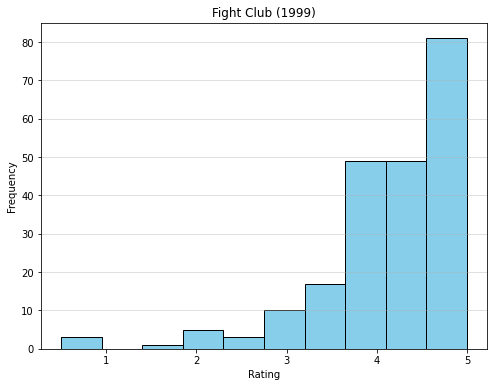

In [14]:
# To find data distribution of user ratings

movie_title = "Fight Club (1999)"
movie_id = movie_df[movie_df['title'] == movie_title]['movieId'].values[0]
fight_club_ratings = rating_df[rating_df['movieId'] == movie_id]['rating']

plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=10, color='skyblue', edgecolor='black')
plt.title(movie_title)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [16]:
# Mandatary Operations

# 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
grouped_ratings = rating_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
merged_data = pd.merge(movie_df, grouped_ratings, on='movieId', how='inner')

# 3. Filter only those movies which have more than 50 user ratings (i.e. > 50).
filtered_movies = merged_data[merged_data['rating_count'] > 50]

filtered_movies.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [17]:
# To find the movie with the highest average user rating
most_popular_movie = filtered_movies.loc[filtered_movies['rating_mean'].idxmax()]
print("The most popular movie based on average user ratings is", most_popular_movie['title'])
print("Average user rating", most_popular_movie['rating_mean'])

The most popular movie based on average user ratings is Shawshank Redemption, The (1994)
Average user rating 4.429022082018927


In [18]:
# To Select the top 5 movies based on rating count
sorted_movies_by_rating_count = filtered_movies.sort_values('rating_count', ascending=False)
top_5_popular_movies = sorted_movies_by_rating_count.head(5)
print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [19]:
# To find third most popular sci fi movie

sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False)]
sorted_sci_fi_movies = sci_fi_movies.sort_values('rating_count', ascending=False)
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]
print(third_most_popular_sci_fi_movie['title'])

Jurassic Park (1993)


In [27]:
# Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings.

import requests
from bs4 import BeautifulSoup

links_df = pd.read_csv("P:\Artificial Intelligence\internship code\datasets\movie data\links.csv")

popular_movies = merged_data[merged_data['rating_count'] > 50]

for index, row in filtered_movies.iterrows():
    movie_id = row['movieId']
    imdb_id = links_df[links_df['movieId'] == movie_id]['imdbId'].values[0]
    imdb_url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"

    response = requests.get(imdb_url)
    if response.status_code == 200:
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')
        reviews = soup.find_all(class_='text show-more__control')
        print()
        print(row['title'], imdb_id)
        for review in reviews[:3]:
            print(review.text.strip())


Slumdog Millionaire (2008) 1010048
Danny Boyle has come up with some interesting cinema, certainly defining himself as someone above average. What he achieves in "Slumdog Millionaire" is transcend the line between inspiration and a miracle, awakening an emotional connection to the very special element great cinema can deliver. The packages might have changed, and the contents are more controversial and maybe a bit more tied to reality, certainly taking us to an exotic local, teaching us that our world extends beyond our freeway and limited perception of how more than the other half of the world's population has to deal without certainly preaching to us.The tale of two brothers' lives is told to us through episodic flashbacks tied to an episode of India's "Who Wants to be a millionaire?". At first, the story introduces one of the brothers as being the subject of a very strong interrogation to find out whether he is being truthful about some knowledge that might be relevant to the game.

In [25]:
# To find movieId of the movie which has the highest IMDB rating.


highest_rating = 0
highest_rated_movie_id = None

for index, row in filtered_movies.iterrows():
    movie_id = row['movieId']
    imdb_id = links_df[links_df['movieId'] == movie_id]['imdbId'].values[0]
    imdb_url = f"https://www.imdb.com/title/tt{imdb_id}/"

    response = requests.get(imdb_url)

    if response.status_code == 200:
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')

        rating_element = soup.find('span', itemprop='ratingValue')
        if rating_element:
            imdb_rating = float(rating_element.text)

            if imdb_rating > highest_rating:
                highest_rating = imdb_rating
                highest_rated_movie_id = movie_id

print(highest_rated_movie_id)

318


In [23]:
# To find movieId of the "Sci-Fi" movie which has the highest IMDB rating.


grouped_ratings = rating_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

merged_data = pd.merge(movie_df, grouped_ratings, on='movieId', how='inner')
filtered_scifi_movies = merged_data[(merged_data['rating_count'] > 50) &
                                    (merged_data['genres'].str.contains('Sci-Fi', case=False))]



In [24]:
highest_rating = 0
highest_rated_scifi_movie_id = None

for index, row in filtered_scifi_movies.iterrows():
    movie_id = row['movieId']
    imdb_id = links_df[links_df['movieId'] == movie_id]['imdbId'].values[0]
    imdb_url = f"https://www.imdb.com/title/tt{imdb_id}/"

    response = requests.get(imdb_url)
    if response.status_code == 200:
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')

        rating_element = soup.find('span', itemprop='ratingValue')
        if rating_element:
            imdb_rating = float(rating_element.text)

            if imdb_rating > highest_rating:
                highest_rating = imdb_rating
                highest_rated_scifi_movie_id = movie_id

print(highest_rated_scifi_movie_id)

79132
